# Waveforms

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import Audio, display, Image
from abc import ABC, abstractmethod

In [2]:
sr = 44100

In [3]:
class Waveform(ABC):
  '''
    f: frequency
    duration: duration of the generated signal in terms of seconds, should be positive integer
    sr: sample rate(or frequency sample)
    cycle_length: number of samples in a single cycle
    t: time variable
  '''
  
  signal = None;

  def __init__(self, f, duration=1, sr=44100):
    self.f = f
    self.duration = duration
    self.sr = sr
    self.definition = None
    self.cycle_length = sr // f
    self.t = np.linspace(0, self.duration, self.sr * self.duration, endpoint=False)

  @abstractmethod
  def create_signal(self):
    pass

  def show_definition(self):
    if self.definition is not None:
      display(Image(url=self.definition))

  def plot_wave(self):
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(self.t[0:self.cycle_length], self.signal[0:self.cycle_length])

  def play(self):
    display(Audio(self.signal, rate=self.sr))

In [4]:
def analyse(waveform):
  if not isinstance(waveform, Waveform):
    raise TypeError("Object is not type of Waveform")

  waveform.create_signal()
  waveform.show_definition()
  waveform.plot_wave()
  waveform.play()

In [5]:
class Sine(Waveform):

  def create_signal(self):
    self.signal = np.sin(2 * np.pi * self.f * self.t)

In [6]:
class Square_Fourier(Waveform):
  '''
    sigma: See https://en.wikipedia.org/wiki/Gibbs_phenomenon
  '''

  def __init__(self, f, duration=1, sr=44100, sigma=125):
    super().__init__(f, duration, sr)
    self.sigma = sigma
    self.definition = "https://wikimedia.org/api/rest_v1/media/math/render/svg/174cbfb1d54af453605efa9d7a63e8c0f4a49087"

  def create_signal(self):
    signal = np.zeros(self.t.shape)

    # i = 2k - 1

    for i in np.arange(1, self.sigma, 2):
      signal += (4 / (np.pi * i)) * np.sin(2 * np.pi * self.f * self.t * i)

    self.signal = signal

In [7]:
class Square_General_Definition(Waveform):

  def __init__(self, f, duration=1, sr=44100):
    super().__init__(f, duration, sr)
    self.definition = "https://wikimedia.org/api/rest_v1/media/math/render/svg/4b99fadb88e3444b91e7fc6636a3eb4fe3e581b2"

  def create_signal(self):
    self.signal = 4 * np.floor(self.t * self.f) - 2 * np.floor (2 * self.t * self.f) + 1

In [8]:
class Sawtooth_General_Definition(Waveform):

  def __init__(self, f, duration=1, sr=44100):
    super().__init__(f, duration, sr)
    self.definition = "https://wikimedia.org/api/rest_v1/media/math/render/svg/f870a340c8a7a6d1ad7b37dfed8aa8b190db676b"

  def create_signal(self):
    self.signal = 2 * (self.t * self.f - np.floor(self.t  * self.f + 0.5))

In [9]:
class Triangle_General_Definition(Waveform):

  def __init__(self, f, duration=1, sr=44100):
    super().__init__(f, duration, sr)
    self.definition = "https://wikimedia.org/api/rest_v1/media/math/render/svg/6105ccfa931d4b3d6b0f7f07a32de5c38388c5aa"

  def create_signal(self):
    self.signal = 4 * np.abs(self.t * self.f - np.floor(self.t * self.f + 0.75) + 0.25) - 1

## Sine Wave

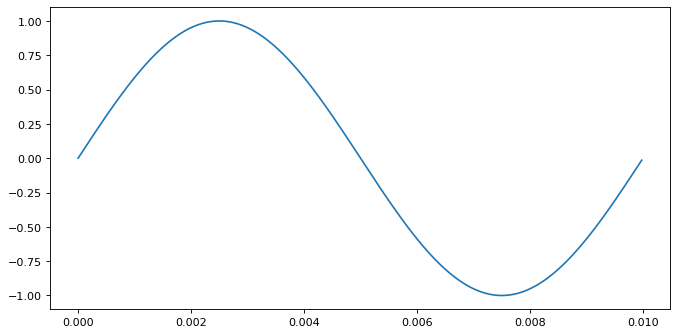

In [10]:
analyse(Sine(f=100))

## Square Wave with Fourier Series

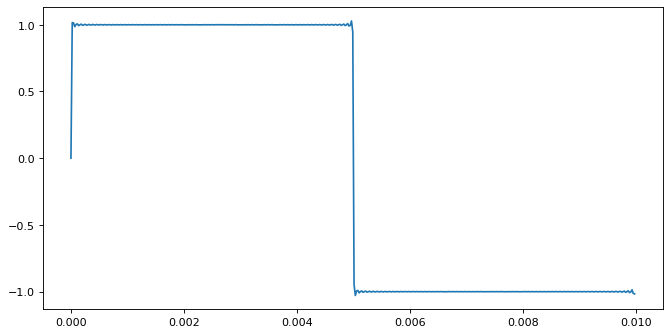

In [11]:
analyse(Square_Fourier(f=100, sigma=1025))

## Square Wave with General Definition

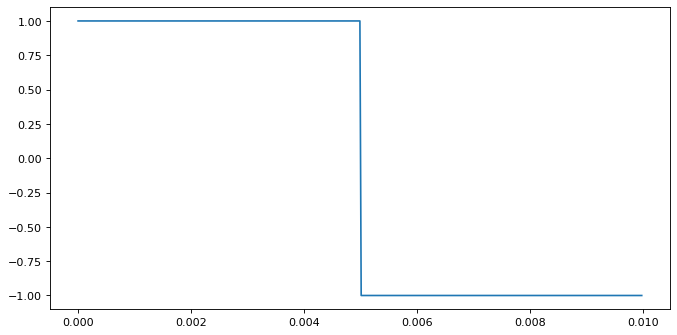

In [12]:
analyse(Square_General_Definition(f=100))

## Sawtooth Wave with General Definition

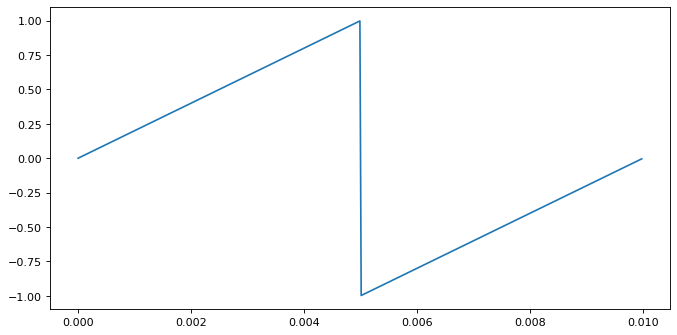

In [13]:
analyse(Sawtooth_General_Definition(f=100))

## Triangle Wave with General Definition

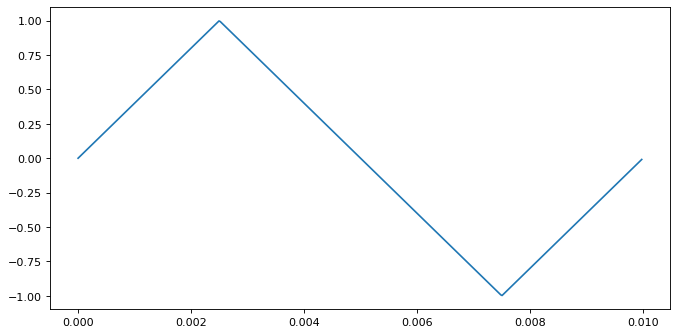

In [14]:
analyse(Triangle_General_Definition(f=100))

## Melody

In [15]:
duration = 1

notes = {
    "A#2": None,
    "C#3": None,
    "D#3": None,
    "F3": None,
    "F#3": None,
}

notes["A#2"] = Sawtooth_General_Definition(f=116.541, duration=duration)
notes["C#3"] = Sawtooth_General_Definition(f=138.591, duration=duration)
notes["D#3"] = Sawtooth_General_Definition(f=155.563, duration=duration)
notes["F3"] = Sawtooth_General_Definition(f=174.614, duration=duration)
notes["F#3"] = Sawtooth_General_Definition(f=184.997, duration=duration)

notes["A#2"].create_signal()
notes["C#3"].create_signal()
notes["D#3"].create_signal()
notes["F3"].create_signal()
notes["F#3"].create_signal()

len_note = int(sr / 4.286) # 140 BPM, Length of 1 beat: 0.4286 seconds

melody = np.concatenate([
    notes["A#2"].signal[:len_note],
    notes["C#3"].signal[:len_note],
    notes["D#3"].signal[:len_note],
    notes["F3"].signal[:len_note],
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    notes["C#3"].signal[:len_note],
    notes["D#3"].signal[:len_note],
    notes["F3"].signal[:len_note],
    notes["F#3"].signal[:len_note],
    notes["F3"].signal[:len_note],
    notes["C#3"].signal[:len_note],
    notes["D#3"].signal[:len_note],
    np.zeros(sr // 2),
    notes["D#3"].signal[:len_note],
    notes["C#3"].signal[:len_note],
    np.zeros(sr // 4),
    notes["F3"].signal[:len_note],
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    notes["A#2"].signal[:len_note],
    np.zeros(len_note),
    ]
)

melody_loop = np.tile(melody, 2)

display(Audio(melody_loop, rate=sr))